## Non Farm Payroll Time Series

In [ ]:
!pip install alpha_vantage
!pip install prophet
!pip install --upgrade statsmodels

In [ ]:
import os 
import numpy as np
import pandas as pd
from datetime import datetime
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## The google drive mounting is for using local library

In [ ]:
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

# Insert the directory to syspath
import sys
sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from time_series_utils import timeseries_evaluation_metrics_func, timeseries_RMSE_calc, \
                          create_proph_train_test, find_best_Prophet_model, \
                          find_best_ETS_model, find_best_ARIMA_model, find_best_SARIMAX_model

## NON-FARM PAYROLL

In [62]:
import requests
with open('drive/MyDrive/ALPHAVANTAGE_API_KEY.txt') as f:
    api_key = f.readline()

In [ ]:
url = f'https://www.alphavantage.co/query?function=NONFARM_PAYROLL&apikey={api_key}'
r = requests.get(url)

In [ ]:
data = r.json()
print(data)

{'name': 'Total Nonfarm Payroll', 'interval': 'monthly', 'unit': 'thousands of persons', 'data': [{'date': '2022-03-01', 'value': '149938'}, {'date': '2022-02-01', 'value': '149144'}, {'date': '2022-01-01', 'value': '147505'}, {'date': '2021-12-01', 'value': '150352'}, {'date': '2021-11-01', 'value': '150210'}, {'date': '2021-10-01', 'value': '149310'}, {'date': '2021-09-01', 'value': '147651'}, {'date': '2021-08-01', 'value': '146947'}, {'date': '2021-07-01', 'value': '146452'}, {'date': '2021-06-01', 'value': '146493'}, {'date': '2021-05-01', 'value': '145304'}, {'date': '2021-04-01', 'value': '144358'}, {'date': '2021-03-01', 'value': '143308'}, {'date': '2021-02-01', 'value': '142129'}, {'date': '2021-01-01', 'value': '140974'}, {'date': '2020-12-01', 'value': '143605'}, {'date': '2020-11-01', 'value': '144115'}, {'date': '2020-10-01', 'value': '143565'}, {'date': '2020-09-01', 'value': '141958'}, {'date': '2020-08-01', 'value': '140727'}, {'date': '2020-07-01', 'value': '139105'},

In [ ]:
df4 = pd.DataFrame(data['data'])
df4.head()

date   value
0  2022-03-01  149938
1  2022-02-01  149144
2  2022-01-01  147505
3  2021-12-01  150352
4  2021-11-01  150210

Make the time series ascending

In [ ]:
df4 = df4[::-1] 
df4.head()

date  value
998  1939-01-01  29296
997  1939-02-01  29394
996  1939-03-01  29804
995  1939-04-01  29786
994  1939-05-01  30145

In [ ]:
df4.date = pd.to_datetime(df4.date)
df4.value = df4.value.astype(int)

In [ ]:
df4.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [ ]:
df4.tail()

date   value
4 2021-11-01  150210
3 2021-12-01  150352
2 2022-01-01  147505
1 2022-02-01  149144
0 2022-03-01  149938

In [ ]:
df4.shape

(999, 2)

In [ ]:
df4 = df4.set_index('date')
df4

value
date              
1939-01-01   29296
1939-02-01   29394
1939-03-01   29804
1939-04-01   29786
1939-05-01   30145
...            ...
2021-11-01  150210
2021-12-01  150352
2022-01-01  147505
2022-02-01  149144
2022-03-01  149938

[999 rows x 1 columns]

In [ ]:
df4.index

DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', name='date', length=999, freq=None)

In [ ]:
df4.columns = ['payroll']

In [ ]:
df4.head()

payroll
date               
1939-01-01    29296
1939-02-01    29394
1939-03-01    29804
1939-04-01    29786
1939-05-01    30145

In [ ]:
from datetime import datetime, timedelta
train_dataset_end = datetime(2020,12,31)
test_dataset_end = datetime(2022,3,1)

In [ ]:
train_data = df4[:train_dataset_end]
test_data = df4[train_dataset_end+timedelta(days=0):test_dataset_end]

In [ ]:
train_data.tail(2)

payroll
date               
2020-11-01   144115
2020-12-01   143605

In [ ]:
test_data

payroll
date               
2021-01-01   140974
2021-02-01   142129
2021-03-01   143308
2021-04-01   144358
2021-05-01   145304
2021-06-01   146493
2021-07-01   146452
2021-08-01   146947
2021-09-01   147651
2021-10-01   149310
2021-11-01   150210
2021-12-01   150352
2022-01-01   147505
2022-02-01   149144
2022-03-01   149938

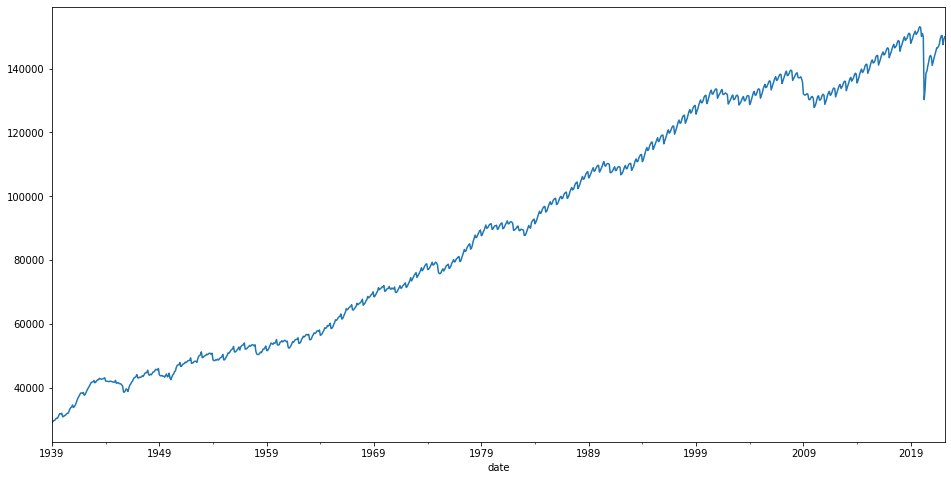

In [ ]:
df4['payroll'].plot(figsize=(16,8))

In [ ]:
# Value Columns to be used in all models tuning
val_col = 'payroll'

In [ ]:
import statsmodels.api as sm 
from statsmodels.tsa.seasonal import seasonal_decompose

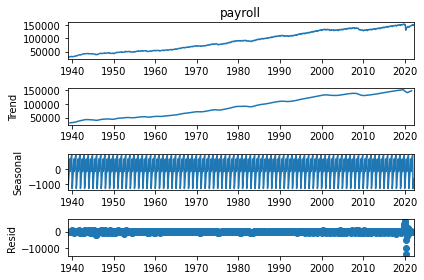

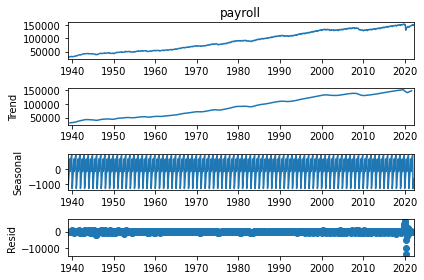

In [61]:
seasonal_decompose(df4[val_col], model='additive', period=12).plot() 

## Holt Winters ExponentialSmoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
best_ETS_model, best_RMSE, best_ETS_params = find_best_ETS_model(train_data, test_data,\
                                                                 val_col=val_col, seasonal_periods=[12])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/stats

In [ ]:
best_RMSE, best_ETS_params

(3633.4260364343763, ('add', 'add', 12))

In [ ]:
# best_RMSE, best_ETS_params
# (3633.4260364343763, ('add', 'add', 12))

In [ ]:
test_pred_ETS = best_ETS_model.forecast(len(test_data))
test_pred_ETS

2021-01-01    140750.880547
2021-02-01    141730.126976
2021-03-01    142382.550498
2021-04-01    141350.331093
2021-05-01    144480.883133
2021-06-01    145453.144296
2021-07-01    143938.071969
2021-08-01    144033.078293
2021-09-01    144381.404335
2021-10-01    145294.449585
2021-11-01    145567.673507
2021-12-01    145202.531932
2022-01-01    142332.321416
2022-02-01    143311.567846
2022-03-01    143963.991368
Freq: MS, dtype: float64

In [ ]:
test_data['Predicted_ETS'] = test_pred_ETS

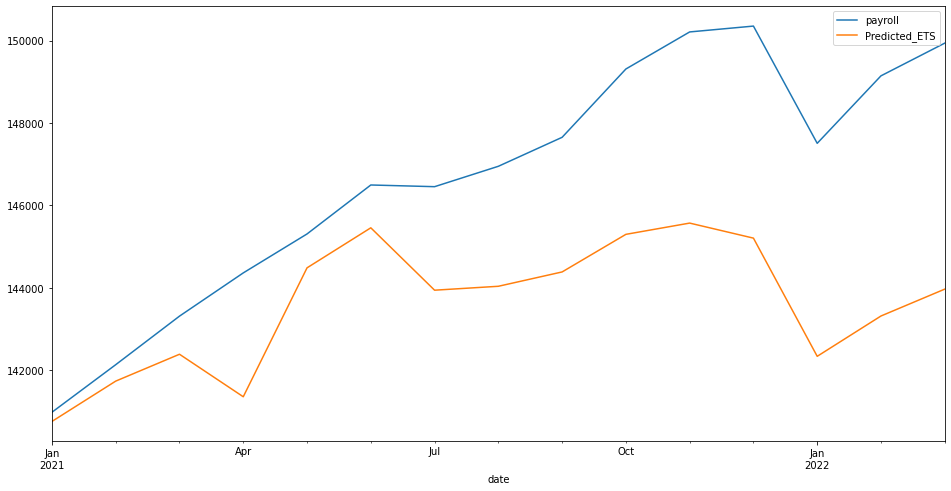

In [ ]:
test_data[[val_col, 'Predicted_ETS']].plot(figsize=(16,8))

## ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
best_ARIMA_model, best_RMSE, best_pdq = find_best_ARIMA_model(train_data, test_data, val_col=val_col,\
                                                              p=[8],d=[1],q=[2])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

In [ ]:
best_pdq, best_RMSE

((8, 1, 2), 3240.775232236448)

In [ ]:
# best_pdq, best_RMSE
# ((8, 1, 2), 3218.125490381145)

In [ ]:
test_pred_arima = best_ARIMA_model.predict(start=test_data.index[0], end=test_data.index[-1])

In [ ]:
test_data['Predicted_ARIMA'] = test_pred_arima

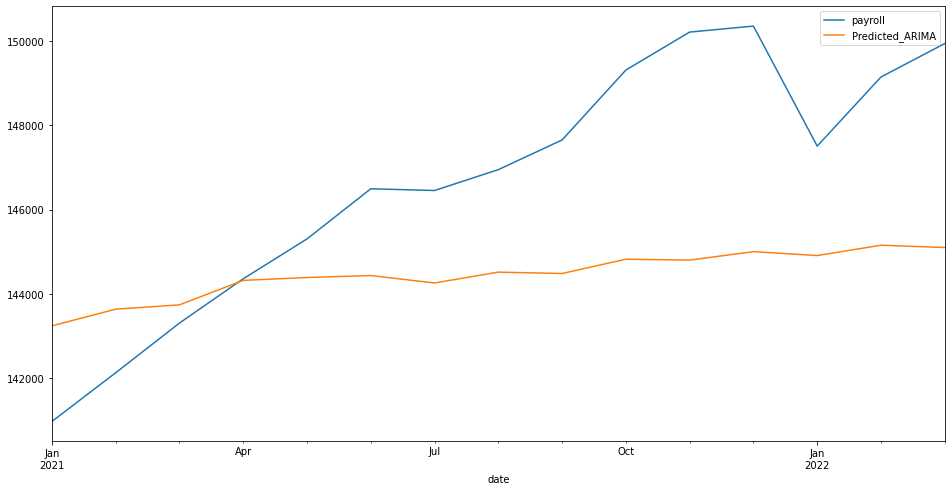

In [ ]:
test_data[[val_col, 'Predicted_ARIMA']].plot(figsize=(16,8))

## SARIMAX model

In [ ]:
# put temp to skip dependency of rerun ARIMA
best_pdq = (8,1,2)

In [ ]:
# seasonal period from ETS result
# seasonal_period = best_ETS_params[2]
seasonal_period = 12

In [ ]:
# create a SARIMAX model 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
best_SARIMAX_model, best_RMSE, best_PDQ = find_best_SARIMAX_model(train_data, test_data, best_pdq, \
                                                                  val_col=val_col, season_period=seasonal_period)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
best_RMSE, best_PDQ

(3240.775232236448, (0, 0, 0, 12))

In [ ]:
pred_test_SARIMAX = best_SARIMAX_model.predict(start=test_data.index[0], end=test_data.index[-1])

In [ ]:
test_data['Predicted_SARIMAX'] = pred_test_SARIMAX

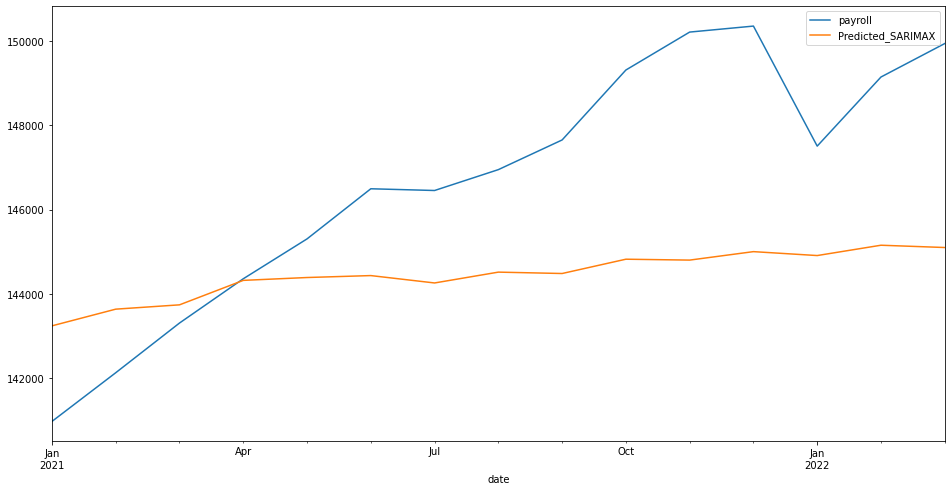

In [ ]:
test_data[[val_col, 'Predicted_SARIMAX']].plot(figsize=(16,8))

## Prophet

In [ ]:
from prophet import Prophet

In [ ]:
proph_train, proph_test = create_proph_train_test(train_data, test_data, date_col='date', val_col=val_col)

In [ ]:
best_Prophet_model, best_RMSE, best_Prophet_params = find_best_Prophet_model(
    proph_train, proph_test, test_data, val_col=val_col,freq='MS',\
    n_changepoints=[50,100], yearly_seasonality=[3,5])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

In [ ]:
best_Prophet_params, best_RMSE

(('linear', 50, 'multiplicative', 5), 2132.84715018222)

In [ ]:
# best_Prophet_params, best_RMSE
# (('linear', 50, 'multiplicative', 5), 2132.84715018222)

In [ ]:
future = best_Prophet_model.make_future_dataframe(periods=len(proph_test), freq='MS')
forecast = best_Prophet_model.predict(future)

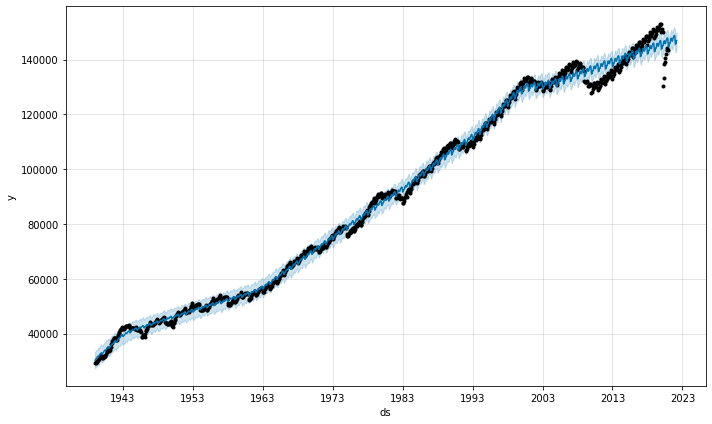

In [ ]:
fig1 = best_Prophet_model.plot(forecast)

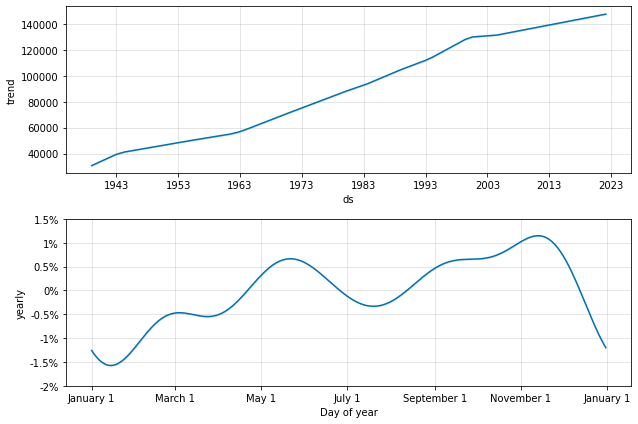

In [ ]:
fig2 = best_Prophet_model.plot_components(forecast)

In [ ]:
test_data['Predicted_Prophet'] = forecast[-(len(proph_test)):][['ds', 'yhat']].set_index('ds')

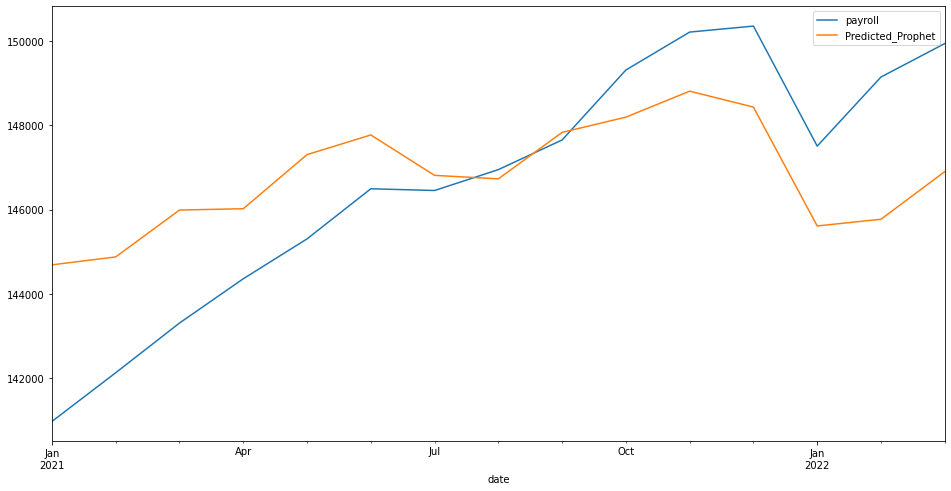

In [ ]:
test_data[[val_col, 'Predicted_Prophet']].plot(figsize=(16,8))

## Metrics

In [ ]:
timeseries_evaluation_metrics_func(test_data.payroll, test_data.Predicted_ETS)

Evaluation metric results:-
Mean Square Error is : 13201784.762239221
Mean Absolute Error is : 3060.132880392956
Root Mean Square Error is : 3633.4260364343763
Mean Absolute Percentage Error is : 2.0643350716376774
R2 score is : -0.6066638758688083



In [ ]:
timeseries_evaluation_metrics_func(test_data.payroll, test_data.Predicted_ARIMA)

Evaluation metric results:-
Mean Square Error is : 10502624.105877204
Mean Absolute Error is : 2779.0393778832145
Root Mean Square Error is : 3240.775232236448
Mean Absolute Percentage Error is : 1.877260572411518
R2 score is : -0.27817466021766357



In [ ]:
timeseries_evaluation_metrics_func(test_data.payroll, test_data.Predicted_SARIMAX)

Evaluation metric results:-
Mean Square Error is : 10502624.105877204
Mean Absolute Error is : 2779.0393778832145
Root Mean Square Error is : 3240.775232236448
Mean Absolute Percentage Error is : 1.877260572411518
R2 score is : -0.27817466021766357



In [ ]:
timeseries_evaluation_metrics_func(test_data.payroll, test_data.Predicted_Prophet)

Evaluation metric results:-
Mean Square Error is : 4549036.9660404185
Mean Absolute Error is : 1838.9851930326724
Root Mean Square Error is : 2132.84715018222
Mean Absolute Percentage Error is : 1.2589989917243056
R2 score is : 0.44637990279661965



### Conclusion:  
 For Non-Farm payroll, the Prophet model yield the smallest MSE and MAE and the only model with positive R2 score which means we could trust the number. 
 The order of model from best to worst are: Prophet, ARIMA and SARIMAX with equal score, and lastly the ETS model. 
 